In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from textwrap import indent

from IPython.display import Javascript

from liblet import ANTLR, AnnotatedTreeWalker, Tree, pyast2tree, side_by_side

from operator import add, mul, truediv, sub

from operator import itemgetter

from IPython.display import Latex

from fractions import Fraction

import importlib

from core.arithmetic_manager import ArithManager

from core.util import *

from core.shunting_yard_parser import ShuntingYardParser
from core.arithmetic_manager import ArithManager
from core.util import *

In [4]:
ex1 = '1 + {2 x [(3 + 4 : 2) + 5] x 6} - [ 7 + (1 + 8) : 3 ] x [ 9 : (2 + 1) + 2 ]'
ex2 = '< 2 + 3 > / 4 / < 5 + 6 > / 7'
ex3 = '2 ^ < 3 + 4 ^ 5 : 2 ^ 7 >'
ex4 = '3 + 13 x -<1 + 3>/<2^<1+4> - 6>'
ex5a = '3 / < 4 + 2 > + 2 x { 3 : ( 4 + 5 ) + 2 ^ < 6 x 1/2 > } - < 2 x [ 5 x ( 3 + 4 ) + 5 ] - 1 > / 6'
ex5b = '3 / < 4 + 2 > + 2 x ( 3 : ( 4 + 5 ) + 2 ^ < 6 x 1/2 > ) - < 2 x ( 5 x ( 3 + 4 ) + 5 ) - 1 > / 6'

expr = '( - ( - - ( ( 43 ) ) ^ 2 x ( - ( 78 ) + - ( 94 ) ) ) x - ( ( 19 - 69 ) ) - - ( ( ( - 100 ^ 2 - ( 36 ) ) ) ) )'


expr = '2^-3/2'

src = expr

AM = ArithManager()
ptree = AM.ptree('antlrGrammar.g', src)
ast = AM.ptree2ast(ptree)
blocks = AM.blocks(ast)
MEMORY = dict(blocks)

#display(ast)

main_block = blocks[-1][1]
child_to_calc = None

current_block = block_id = None

while blocks and is_calculable(blocks[0][1]): blocks = blocks[1:]
    
while blocks:
    block_id, current_block = blocks[0]
        
    parent_to_calc = AM.prior(current_block)
    display_latex(AM.latex(main_block, MEMORY))

    parent_to_calc.children =  [Tree({'type': 'atomExpr', 'value': AM.eval(child, MEMORY), 'priority': 0, '_calc': 'last'}, []) 
                                if is_next_to_calc(child) else child
                                for child in parent_to_calc.children]
    
    if is_calculable(current_block):
        current_block = current_block.children[0]
        blocks = blocks[1:]
        
    MEMORY[block_id] = current_block

display_latex(AM.latex(main_block, {}))



ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
def ast_eval(ast, show_latex, show_ast):
    AM = ArithManager()
    
    if show_ast: display(ast)
        
    blocks = AM.blocks(ast)
    MEMORY = dict(blocks)
    main_block = blocks[-1][1]
    child_to_calc = None
    current_block = block_id = None

    while blocks and is_calculable(blocks[0][1]): blocks = blocks[1:]

    while blocks:
        block_id, current_block = blocks[0]
        parent_to_calc = AM.prior(current_block)
        tex = AM.latex(main_block, MEMORY)
        if show_latex: display_latex(tex)
        
        parent_to_calc.children =  [Tree({'type': 'atomExpr', 'value': AM.eval(child, MEMORY), 'priority': 0, '_calc': 'last'}, []) 
                                    if is_next_to_calc(child) else child
                                    for child in parent_to_calc.children]

        if is_calculable(current_block):
            current_block = current_block.children[0]
            blocks = blocks[1:]

        MEMORY[block_id] = current_block

    tex = AM.latex(main_block, {})
    if show_latex: display_latex(tex)
    
    return main_block.children[0].root['value']


def antlr_eval(expr, show_latex=False, show_ast = False):
    AM = ArithManager()
    ast = AM.ptree2ast(AM.ptree('antlrGrammar.g',expr))
    return ast_eval(ast, show_latex, show_ast)


def shunting_eval(expr, show_latex=False, show_ast = False):
    AM = ArithManager()


    ast = AM.shuntingYardExpr2ast(expr)
    return ast_eval(ast, show_latex, show_ast)


In [30]:
from core.expression_generator import generate_expression

wrong_expr = []
for _ in range(40):
    exception = False
    expr = generate_expression(4)
    
    try:
        antlr_res = antlr_eval(expr)
    except Exception as e:
        print('** EXCEPTION ANTLR ** ', e)
        exception = True

    try:
        shunting_res = shunting_eval(expr)
        if exception: 
            wrong_expr.append(expr)
            continue
    except Exception as e:
        print('** EXCEPTION SHUNTING ** ', e)
        if not exception: 
            wrong_expr.append(expr)
        continue

    formatted_expr = expr.replace('x', '*').replace(':', '/').replace('^', '**')
    res =  round(eval(formatted_expr), 3)

    if antlr_res != shunting_res or abs(antlr_res - res) > 1:
        print("** WRONG ** ", expr)
        wrong_expr.append(expr)
        
    
    #print(antlr_res, shunting_res, res)
        
if wrong_expr != []:
    print(f'*** WRONG {len(wrong_expr)} ***\n')
    for i, it in enumerate(wrong_expr):
        print(f' $$$ {i} $$$  ', it)
else:
    print("ALL DONE")

ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
** EXCEPTION ANTLR **  can't convert complex to int
** EXCEPTION SHUNTING **  can't convert complex to int
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagr

['39', '/', '--', '15', '/', '16']


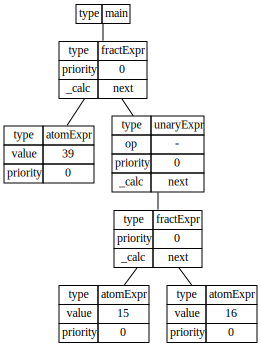

In [30]:
shunting_yard_parser = ShuntingYardParser()

ast = shunting_yard_parser.parse(expr)
ast_eval(ast, False, False)
ast

In [60]:
expr = '( 92 / 19 x ( - 40 / 56 x 28 ) x 79 + 7 / - 45 x - - ( - 47 ) + 18 + ( ( 52 ) ) + 26 ^ 2 x 39 / ( 32 ) ^ -2 ^ -2 / ( ( 81 ) + ( 64 - ( 38 ) ^ 2 ) x 22 - ( 38 ^ -2 ) - - - 14 + - 2 ) x - - ( 94 ) - 16 + 89 - ( 5 ) / 51 / - 100 - - 55 ^ 2 x - ( 35 + 44 ^ -2 - 21 ^ 2 ) + - ( - - 88 + 44 ) + ( - 74 + ( ( - 63 ) ) ) / ( 67 - 53 ) - - 43 x 92 + 39 ^ -2 x 53 ^ -2 - - ( 67 x - 5 - - 17 / 73 ^ 2 ) x - - - ( - 32 ) ^ -2 + 84 - 34 + 17 x 23 / 75 ^ -2 x ( - 35 - ( 31 ) - 17 ) - - - - 64 / 61 / ( - 17 x - ( 94 ) / 15 ) - ( ( 39 ) x 32 x 63 + 66 / - 87 - ( ( ( 20 ) ) ) ) + - - - - 59 - 74 ^ -2 / - 67 / 93 / 2 x 82 ^ 2 ^ 2 ) / - ( ( - - 80 - - 23 / 44 x 63 / - - 18 ) ) / - ( ( - - 49 / 23 ) + 22 ^ -2 ) ^ -2 ^ -2 + ( ( - 38 ^ 2 - 10 / 15 - - 22 / 72 x 86 - ( 37 ) / ( 2 ) / ( - 33 ) - - ( - 22 ) ) )'
formatted_expr = expr.replace('x', '*').replace(':', '/').replace('^', '**')
real_expr = expr.replace('x', '*').replace(':', '/')
print(real_expr)
res =  round(eval(formatted_expr), 3)
shunt = shunting_eval(expr, False, False)
ant = antlr_eval(expr, False, False)
print(shunt, ant, res)



( 92 / 19 * ( - 40 / 56 * 28 ) * 79 + 7 / - 45 * - - ( - 47 ) + 18 + ( ( 52 ) ) + 26 ^ 2 * 39 / ( 32 ) ^ -2 ^ -2 / ( ( 81 ) + ( 64 - ( 38 ) ^ 2 ) * 22 - ( 38 ^ -2 ) - - - 14 + - 2 ) * - - ( 94 ) - 16 + 89 - ( 5 ) / 51 / - 100 - - 55 ^ 2 * - ( 35 + 44 ^ -2 - 21 ^ 2 ) + - ( - - 88 + 44 ) + ( - 74 + ( ( - 63 ) ) ) / ( 67 - 53 ) - - 43 * 92 + 39 ^ -2 * 53 ^ -2 - - ( 67 * - 5 - - 17 / 73 ^ 2 ) * - - - ( - 32 ) ^ -2 + 84 - 34 + 17 * 23 / 75 ^ -2 * ( - 35 - ( 31 ) - 17 ) - - - - 64 / 61 / ( - 17 * - ( 94 ) / 15 ) - ( ( 39 ) * 32 * 63 + 66 / - 87 - ( ( ( 20 ) ) ) ) + - - - - 59 - 74 ^ -2 / - 67 / 93 / 2 * 82 ^ 2 ^ 2 ) / - ( ( - - 80 - - 23 / 44 * 63 / - - 18 ) ) / - ( ( - - 49 / 23 ) + 22 ^ -2 ) ^ -2 ^ -2 + ( ( - 38 ^ 2 - 10 / 15 - - 22 / 72 * 86 - ( 37 ) / ( 2 ) / ( - 33 ) - - ( - 22 ) ) )
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
-2680326.07036 -2680326.07036 -2680331.035


In [57]:
50006678291167707811616843828662750813269008591834603/241192483918931631084333889063910400 

2.0733099754458224e+17

In [8]:
Fraction(1, 2) ** -2

Fraction(4, 1)

In [24]:
expr = '89 + ( - 3 + 100 ) / ( - ( 66 ) ) / - 19 x 37 - 55 / ( 20 x ( 49 x 80 ) ) / ( ( 87 ) - ( - 26 ) ) + - ( - - 88 + 72 / ( - 19 ) ^ -2 + - 31 + 8 ^ -2 ^ -2 + 15 - 89 )'
antlr_res = antlr_eval(expr)

shunting_res = shunting_eval(expr)
antlr_res, shunting_res



ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2


(-25883.73256, -25883.73256)

In [10]:
75713/2704 * -1/36 * 1/25281 * 2.806 * 515070259.31

-44465.29303204521